<a href="https://colab.research.google.com/github/Nagasai122/Covid_sentiment_analysis/blob/main/Covid_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split,KFold

In [78]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Coronavirus Tweets.csv',encoding = 'ISO-8859-1')

In [80]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [81]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [82]:
df.shape

(41157, 6)

In [83]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [85]:
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [86]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [87]:
df['TweetAt']= pd.to_datetime(df['TweetAt'])

In [88]:
df['TweetAt'].min(), df['TweetAt'].max()

(Timestamp('2020-01-04 00:00:00'), Timestamp('2020-12-04 00:00:00'))

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [90]:
df['Location']= df['Location'].fillna('Unknown')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       41157 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.9+ MB


In [92]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [93]:
df['Location'].value_counts()

Unknown                          8593
London                            540
United States                     528
London, England                   520
New York, NY                      395
                                 ... 
Uganda Kampala                      1
Views don't reflect employers       1
Charlotte, MI                       1
East Midlands, UK                   1
i love you so much || he/him        1
Name: Location, Length: 12220, dtype: int64

Text(0, 0.5, 'Tweets Count')

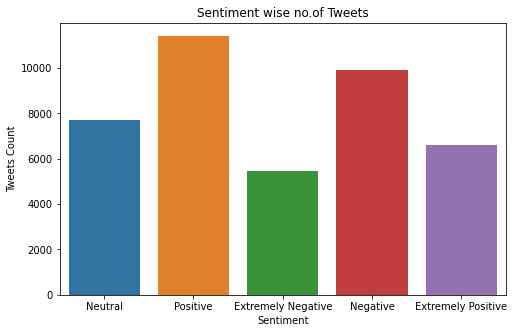

In [94]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Sentiment'])
plt.title('Sentiment wise no.of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Tweets Count')

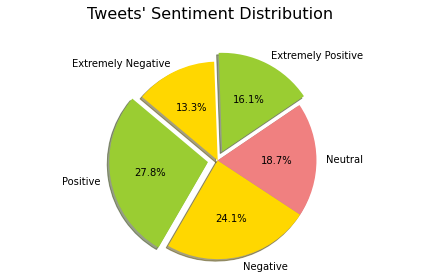

In [95]:
# Show distribution of tweet sentiments
sentiment_dist = df.Sentiment.value_counts()

plt.pie(sentiment_dist, labels=sentiment_dist.index, explode= (0.1,0,0,0.1,0),
        colors=['yellowgreen', 'gold', 'lightcoral'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Tweets\' Sentiment Distribution \n", fontsize=16, color='Black')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [96]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [97]:
place_df = df['Location'].value_counts().head(25)

In [98]:
place_df

Unknown                    8593
London                      540
United States               528
London, England             520
New York, NY                395
Washington, DC              373
United Kingdom              337
Los Angeles, CA             281
India                       268
UK                          232
Australia                   225
USA                         223
England, United Kingdom     191
Canada                      191
Toronto, Ontario            160
Global                      159
Chicago, IL                 155
California, USA             153
San Francisco, CA           152
Boston, MA                  150
New York, USA               140
New Delhi, India            138
New York                    126
Atlanta, GA                 126
Mumbai, India               109
Name: Location, dtype: int64

In [99]:
# Separating City and Country from location column

df['Country']= df.Location.apply(lambda x: x.split(",")[-1].strip() if ("," in x) else x)
df['City']= df.Location.apply(lambda x: x.split(',')[0].strip() if (','in x) else x)

In [100]:
df['Country'].value_counts().head(30)

Unknown           8593
USA               1721
England           1547
CA                1084
India              963
NY                 710
UK                 677
London             676
United Kingdom     653
Canada             554
United States      544
Australia          484
TX                 475
DC                 413
Ontario            349
FL                 332
Nigeria            283
IL                 263
South Africa       255
MA                 253
PA                 235
GA                 194
New York           172
Ireland            172
Scotland           170
Texas              167
New Zealand        163
Global             160
NC                 155
NJ                 150
Name: Country, dtype: int64

In [101]:
#Replacing 2 digit US states with USA

df['Country']= df.Country.apply(lambda x: 'USA' if len(x.lower().strip())<3 and x!= 'uk' else x)

In [102]:
df['Country'].value_counts().head(30)

USA                9243
Unknown            8593
England            1547
India               963
London              676
United Kingdom      653
Canada              554
United States       544
Australia           484
Ontario             349
Nigeria             283
South Africa        255
Ireland             172
New York            172
Scotland            170
Texas               167
New Zealand         163
Global              160
Kenya               141
Pakistan            138
California          137
Los Angeles         113
Florida             105
Worldwide           102
Toronto              97
Germany              97
France               93
Singapore            91
New South Wales      90
New York City        88
Name: Country, dtype: int64

In [103]:
df['Country']= df.Country.apply(lambda x: 'USA' if x.lower().strip() \
                                in ('united states,us,north carolina ,usa,new york,boston,washington dc,arizona,chicago,ottawa,alabama,michigan,new york city,colorado,houston,indiana,nyc,seattle,california,texas,oregon,los angeles,florida,d.c.,san francisco,new jersey,ohio,illinois') else x)
df['Country']= df.Country.apply(lambda x: 'India' if x.lower().strip() in ('india,gujarat,mumbai,chennai, new delhi,bangalore,hyderabad') else x)
df['Country']= df.Country.apply(lambda x: 'UK' if x.lower().strip() in ('united kingdom, london') else x)
df['Country']= df.Country.apply(lambda x: 'Canada' if x.lower().strip() in ('ontario,toronto,victoria,british columbia,alberta') else x)
df['Country']= df.Country.apply(lambda x: 'Australia' if x.lower().strip() in ('australia, new south wales,sydney,melbourne,queensland,south australia') else x)
df['Country']= df.Country.apply(lambda x: 'UAE' if x.lower().strip() in ('dubai,united arab emirates,qatar') else x)
df['Country']= df.Country.apply(lambda x: 'Unknown' if x.lower().strip() \
                                in ('????,??????,worldwide,global,planet earth,everywhere,under the goldy fish,middlesbrough,yo mama house') else x)
df['Country']= df.Country.apply(lambda x: 'Germany' if x.lower().strip() in ('deutschland') else x)
df['Country']= df.Country.apply(lambda x: 'South Africa' if x.lower().strip() in ('johannesburg') else x)
df['Country']= df.Country.apply(lambda x: 'Nigeria' if x.lower().strip() in ('lagos') else x)

In [104]:
df['Country'].value_counts()

USA                             12552
Unknown                          9225
England                          1547
UK                               1375
Canada                           1256
                                ...  
In the hearts and minds             1
A burgundy southern state           1
Blighty                             1
Taured                              1
i love you so much || he/him        1
Name: Country, Length: 7002, dtype: int64

In [105]:
df['City'].value_counts()

Unknown                          8593
London                           1251
New York                          709
United States                     530
Washington                        504
                                 ... 
Harrisburg PA for now               1
Jammu &Kashmir UnionTerritory       1
Reseda                              1
Mid Yell                            1
i love you so much || he/him        1
Name: City, Length: 9725, dtype: int64

In [106]:
# Removing countries from city column
df["City"] = df.City.apply(lambda x: 'Unknown' if x.lower() in \
                                   ['india', 'united states', 'united kingdom', 'uk', 'usa', 'us','canada','australia','uae','england','global'] \
                                   else x)

In [107]:
df['City'].value_counts()

Unknown                          11142
London                            1251
New York                           709
Washington                         504
Los Angeles                        414
                                 ...  
Harrisburg PA for now                1
Jammu &Kashmir UnionTerritory        1
Reseda                               1
Mid Yell                             1
i love you so much || he/him         1
Name: City, Length: 9700, dtype: int64

In [108]:
df2 = df[df['Country']!= 'Unknown']
df2

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country,City
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,UK,London
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,USA,Unknown
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,Vagabonds
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,As news of the regionÂs first confirmed COVID...,Positive,-82.363649,ÃT: 36.319708
6,3805,48757,"35.926541,-78.753267",2020-03-16,Cashier at grocery store was sharing his insig...,Positive,-78.753267,35.926541
...,...,...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",2020-04-14,YÂall really shitting that much more at home?...,Negative,USA,Brooklyn
41149,44948,89900,"Toronto, Ontario",2020-04-14,Still shocked by the number of #Toronto superm...,Negative,Canada,Toronto
41150,44949,89901,OHIO,2020-04-14,I never that weÂd be in a situation &amp; wor...,Positive,USA,OHIO
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket s...,Neutral,New Zealand,Wellington City


In [109]:
df2['Country'].value_counts()

USA                             12552
England                          1547
UK                               1375
Canada                           1256
Australia                         862
                                ...  
In the hearts and minds             1
A burgundy southern state           1
Blighty                             1
Taured                              1
i love you so much || he/him        1
Name: Country, Length: 7001, dtype: int64

In [110]:
top100_countries = df2.Country.value_counts(sort=True, ascending=False)[0:25]
top100_countries = pd.DataFrame(top100_countries)
    
top100_cities= df.City.value_counts(sort=True, ascending=False)[1:26]
top100_cities = pd.DataFrame(top100_cities)

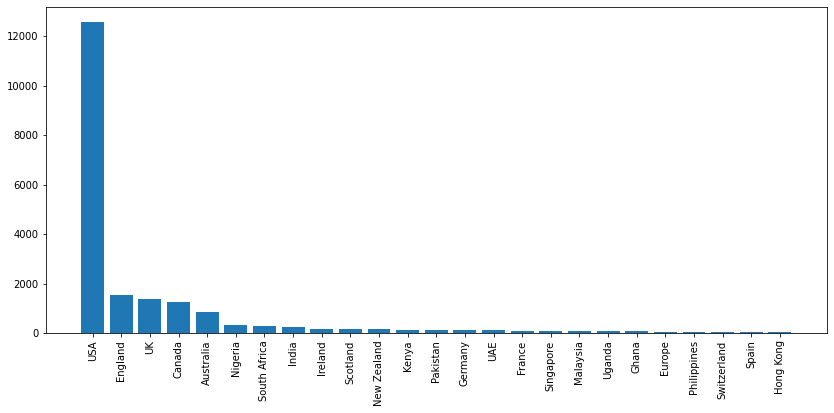

In [111]:
plt.figure(figsize=(14,6))
plt.bar(top100_countries.index,top100_countries.Country)
plt.xticks(rotation=90)
plt.show()

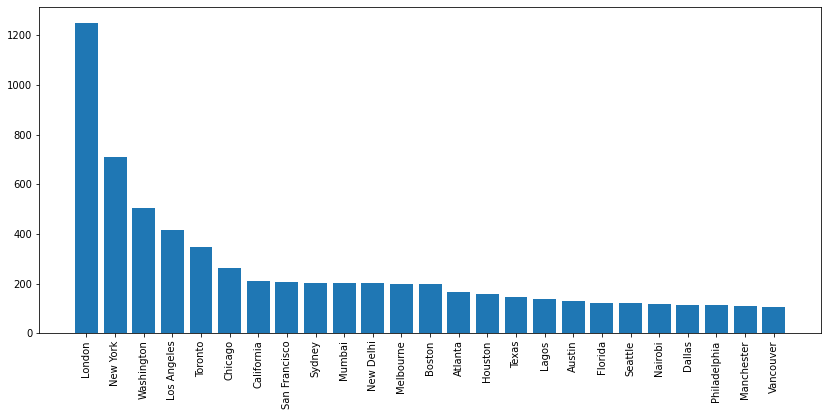

In [112]:
plt.figure(figsize=(14,6))
plt.bar(top100_cities.index,top100_cities.City)
plt.xticks(rotation=90)
plt.show()

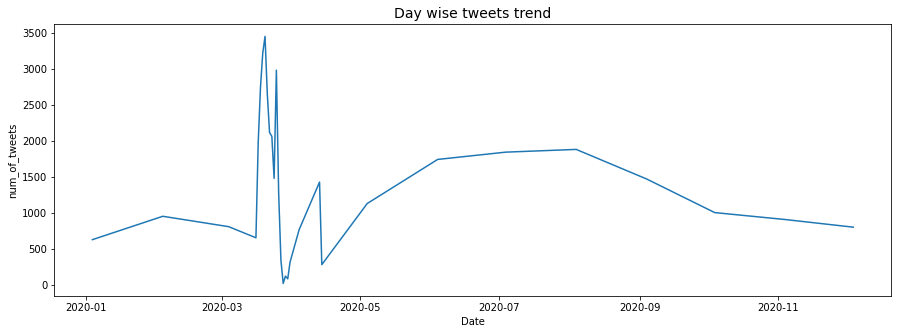

In [113]:
daily_tweets = df.groupby(['TweetAt'])['OriginalTweet'].count()

fig= plt.figure(figsize=(15,5))
plt.plot(daily_tweets.index, daily_tweets.values)
plt.title('Day wise tweets trend',fontsize=14)
plt.xlabel('Date')
plt.ylabel('num_of_tweets')
plt.show()

In [114]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country,City
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,UK,London
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,USA,Unknown
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,Vagabonds
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,Unknown,Unknown
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Unknown,Unknown


In [115]:
df["Year"] = df["TweetAt"].dt.year
df["month"] = df["TweetAt"].dt.month
df["day"] = df["TweetAt"].dt.day
df["dayname"] = df["TweetAt"].dt.day_name()

In [116]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Country,City,Year,month,day,dayname
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,UK,London,2020,3,16,Monday
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,USA,Unknown,2020,3,16,Monday
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,Vagabonds,2020,3,16,Monday
3,3802,48754,Unknown,2020-03-16,My food stock is not the only one which is emp...,Positive,Unknown,Unknown,2020,3,16,Monday
4,3803,48755,Unknown,2020-03-16,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Unknown,Unknown,2020,3,16,Monday


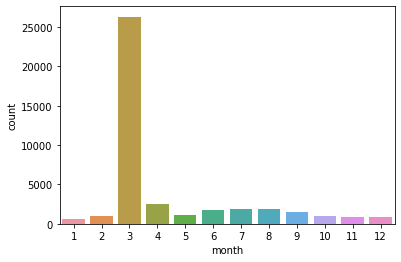

In [117]:
sns.countplot(x=df['month'])

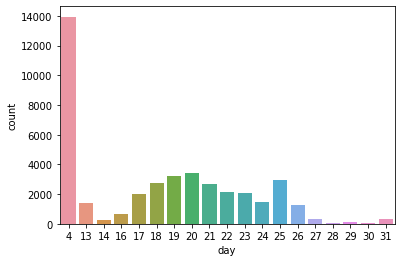

In [118]:
sns.countplot(x=df['day'])

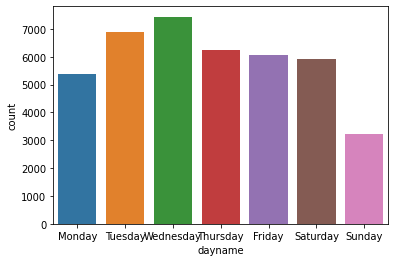

In [119]:
sns.countplot(x=df['dayname'])

In [120]:
df['UserName'].value_counts().sort_values(ascending=False)

3799     1
3958     1
3838     1
3808     1
3801     1
        ..
44949    1
44950    1
44951    1
44952    1
44955    1
Name: UserName, Length: 41157, dtype: int64

In [121]:
df['UserName']= df['UserName'].astype(str)
df['ScreenName']= df['ScreenName'].astype(str)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  object        
 1   ScreenName     41157 non-null  object        
 2   Location       41157 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  object        
 6   Country        41157 non-null  object        
 7   City           41157 non-null  object        
 8   Year           41157 non-null  int64         
 9   month          41157 non-null  int64         
 10  day            41157 non-null  int64         
 11  dayname        41157 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 3.8+ MB


In [123]:
df['OriginalTweet'][0]


'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [124]:
def remove_punctuations(text):
  "This function is to remove punctuations from text"
  import string
  # replacing punctuations with spaces
  # which in effect deletes the punctuations marks
  translator = str.maketrans('','', string.punctuation)
  #return the text stripped of punctuation marks
  return text.translate(translator)

In [125]:
#df['OriginalTweet']= df['OriginalTweet'].apply(remove_punctuations)

In [126]:
#df.iloc[0]['OriginalTweet']

In [127]:
# Convert everything other than a-z, A-Z, 0-9 to space and remove the link from tweets
df['clean_tweet'] = df['OriginalTweet'].apply(lambda x: re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", x))

In [128]:
df.iloc[0]['clean_tweet']

' MeNyrbie  Phil Gahan  Chrisitv   and   and  '

In [129]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [130]:
sw= stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [131]:
def remove_stopwords(text):
  ''' this function is to remove stopwords from text'''
  # removing the stopwords and lowercasing the selected words
  text = [word for word in text.split() if word.lower() not in sw]
  return " ".join(text)

In [132]:
df['clean_tweet']= df['clean_tweet'].apply(remove_stopwords)

In [133]:
df['clean_tweet'][0]

'MeNyrbie Phil Gahan Chrisitv'

In [134]:

def createWordCloud(input_type, text):
    """
    Function to generate the wordcloud

    """
    wordcloud = WordCloud(width = 1000, height = 600, 
                      background_color ='white',
                      collocations = False,
                      stopwords=stop_words
                     ).generate(text)

    plt.figure(figsize = (12, 12), facecolor = None)
    plt.title("Most common "+ input_type +" in the tweets \n", fontsize=20, color='Black')
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

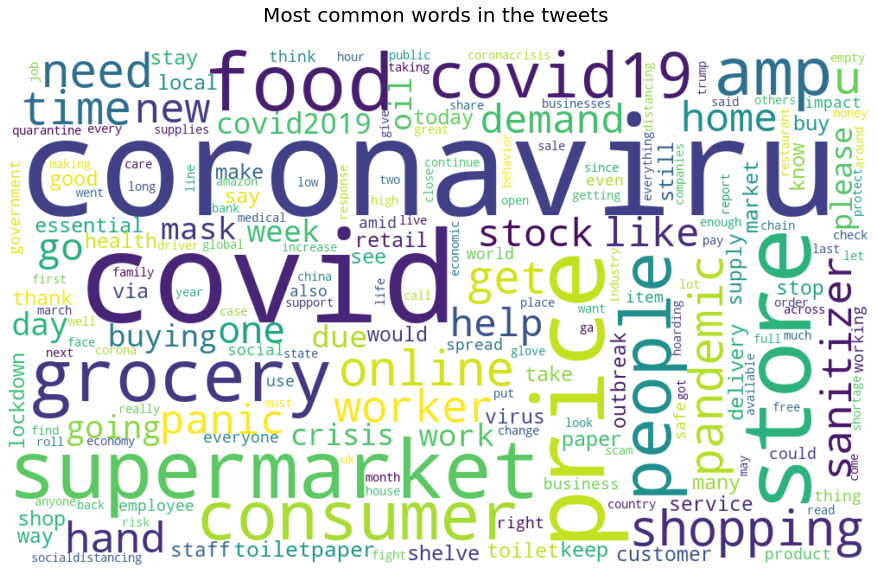

In [135]:
text = '' 
stop_words = set(stopwords.words("english"))
for row in df['clean_tweet']:
    # typecaste each row to string and split it to get tokens
    tokens = str(row).split()
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()
    text += " ".join(tokens)+" "

createWordCloud("words",text)

###Top words before lemmatization

Collect vocabulary count

In [136]:
cv = CountVectorizer()
# fit the count vectorizer using the text data
cv.fit(df['clean_tweet'])
# collect the vocabulary items used in vectorizer
dictionary = cv.vocabulary_.items()

In [137]:
vocab = []
count = []

for key, value in dictionary:
  vocab.append(key)
  count.append(value)

vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

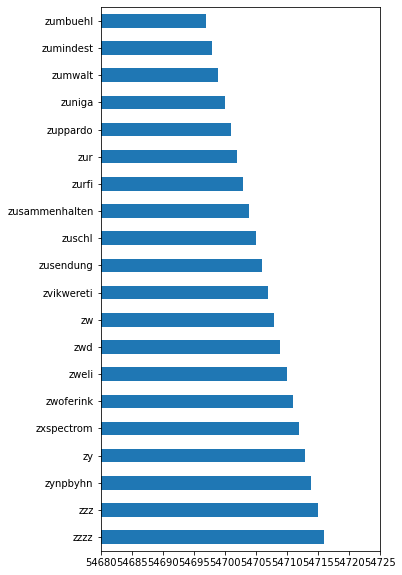

In [138]:
top_vocab = vocab_bef_stem.head(20)
top_vocab.plot(kind='barh',figsize=(5,10),xlim=(54680,54725))

In [139]:
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [140]:
lemmatizer= WordNetLemmatizer()

def lemmatizing(text):
  ''' a function which lemmatize each word in given text'''
  words = nltk.word_tokenize(text)
  output = " ".join([lemmatizer.lemmatize(word) for word in words])
  return output


In [141]:
df['clean_tweet']= df['clean_tweet'].apply(lemmatizing)
df['clean_tweet'].head(10)

0                         MeNyrbie Phil Gahan Chrisitv
1    advice Talk neighbour family exchange phone nu...
2    Coronavirus Australia Woolworths give elderly ...
3    food stock one empty PLEASE panic ENOUGH FOOD ...
4    ready go supermarket COVID19 outbreak paranoid...
5    news region first confirmed COVID 19 case came...
6    Cashier grocery store sharing insight Covid 19...
7    supermarket today buy toilet paper Rebel toile...
8    Due COVID 19 retail store classroom Atlanta op...
9    corona prevention stop buy thing cash use onli...
Name: clean_tweet, dtype: object

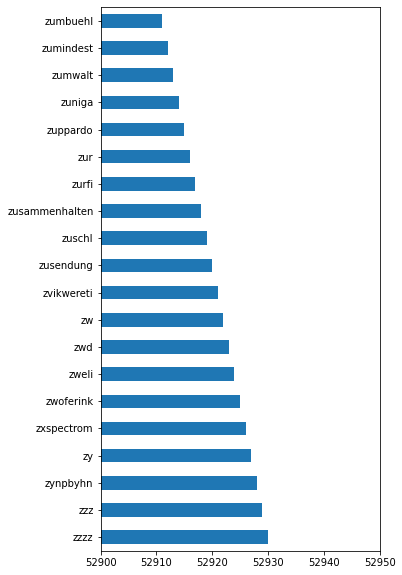

In [142]:
cv = CountVectorizer()
# fit the count vectorizer using the text data
X_cv = cv.fit(df['clean_tweet'])
# collect the vocabulary items used in vectorizer
dictionary = cv.vocabulary_.items()


vocab = []
count = []

for key, value in dictionary:
  vocab.append(key)
  count.append(value)

vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

top_vocab = vocab_bef_stem.head(20)
top_vocab.plot(kind='barh',figsize=(5,10),xlim=(52900,52950))

In [149]:
tw_df = df[['clean_tweet','Sentiment']]

tw_df = tw_df.copy()

tw_df

,clean_tweet,Sentiment
0,MeNyrbie Phil Gahan Chrisitv,Neutral
1,advice Talk neighbour family exchange phone nu...,Positive
2,Coronavirus Australia Woolworths give elderly ...,Positive
3,food stock one empty PLEASE panic ENOUGH FOOD ...,Positive
4,ready go supermarket COVID19 outbreak paranoid...,Extremely Negative
...,...,...
41152,Airline pilot offering stock supermarket shelf...,Neutral
41153,Response complaint provided citing COVID 19 re...,Extremely Negative
41154,know getting tough KameronWilds rationing toil...,Positive
41155,wrong smell hand sanitizer starting turn coron...,Neutral


In [150]:
def senti_score (x):
    if x == "Extremely Positive" or x == "Positive":
        return 1
    elif x =="Extremely Negative" or x =="Negative":
        return -1
    elif x =="Neutral":
        return 0

In [151]:
tw_df['Modified_sentiment']= tw_df['Sentiment'].apply(senti_score)
tw_df

,clean_tweet,Sentiment,Modified_sentiment
0,MeNyrbie Phil Gahan Chrisitv,Neutral,0
1,advice Talk neighbour family exchange phone nu...,Positive,1
2,Coronavirus Australia Woolworths give elderly ...,Positive,1
3,food stock one empty PLEASE panic ENOUGH FOOD ...,Positive,1
4,ready go supermarket COVID19 outbreak paranoid...,Extremely Negative,-1
...,...,...,...
41152,Airline pilot offering stock supermarket shelf...,Neutral,0
41153,Response complaint provided citing COVID 19 re...,Extremely Negative,-1
41154,know getting tough KameronWilds rationing toil...,Positive,1
41155,wrong smell hand sanitizer starting turn coron...,Neutral,0


In [152]:
tw_df['Modified_sentiment'].value_counts()

 1    18046
-1    15398
 0     7713
Name: Modified_sentiment, dtype: int64

In [153]:
tw_df.drop(columns=['Sentiment'],axis=1, inplace=True)

In [154]:
tw_df

,clean_tweet,Modified_sentiment
0,MeNyrbie Phil Gahan Chrisitv,0
1,advice Talk neighbour family exchange phone nu...,1
2,Coronavirus Australia Woolworths give elderly ...,1
3,food stock one empty PLEASE panic ENOUGH FOOD ...,1
4,ready go supermarket COVID19 outbreak paranoid...,-1
...,...,...
41152,Airline pilot offering stock supermarket shelf...,0
41153,Response complaint provided citing COVID 19 re...,-1
41154,know getting tough KameronWilds rationing toil...,1
41155,wrong smell hand sanitizer starting turn coron...,0


In [155]:
train_data = tw_df.clean_tweet
train_label = tw_df.Modified_sentiment

In [158]:
train_data.shape, train_label.shape

((41157,), (41157,))

In [159]:
train_label= pd.get_dummies(train_label)

In [160]:
train_label

,-1,0,1
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
41152,0,1,0
41153,1,0,0
41154,0,0,1
41155,0,1,0


In [164]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(train_data)
train_dataf= tokenizer.texts_to_sequences(train_data)

word_index = tokenizer.word_index

print("%s Unique tokens" %len(word_index))

52964 Unique tokens


In [180]:
train_dataf

[[21731, 6493, 21732, 12146],
 [413,
  552,
  1594,
  106,
  2392,
  661,
  291,
  1006,
  335,
  279,
  661,
  291,
  1594,
  408,
  1865,
  2237,
  4540,
  370,
  14,
  13,
  883,
  5400,
  3005,
  32,
  954,
  2313,
  104],
 [1, 622, 2579, 195, 226, 1235, 1704, 13, 118, 98, 3, 2, 73],
 [7,
  29,
  30,
  149,
  42,
  21,
  173,
  7,
  82,
  67,
  15,
  53,
  884,
  53,
  99,
  10373,
  3,
  2,
  12,
  1,
  4204,
  15158,
  21733],
 [644,
  23,
  6,
  12,
  73,
  3931,
  7,
  29,
  21734,
  149,
  1,
  750,
  90,
  42,
  21,
  420,
  176,
  21735,
  10374,
  292,
  4204],
 [113,
  1595,
  114,
  1111,
  3,
  2,
  168,
  672,
  15159,
  673,
  119,
  40,
  9,
  10375,
  298,
  5,
  365,
  544,
  32,
  20,
  24,
  7,
  47,
  49,
  57,
  4205,
  21736,
  146],
 [571, 8, 5, 1236, 588, 3, 2, 2866, 10376, 10377, 21737, 1055, 69, 891],
 [6, 54, 61, 47, 49, 8244, 739, 3, 2],
 [35,
  3,
  2,
  48,
  5,
  10378,
  3805,
  144,
  572,
  44,
  1055,
  165,
  166,
  40,
  795,
  716,
  182,
  1033

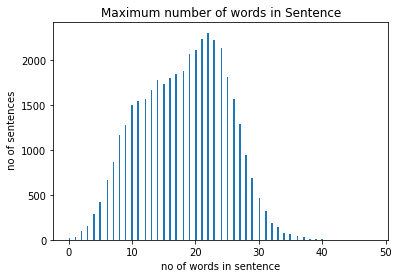

In [166]:
sents_length = [len(s) for s in train_dataf]

plt.title('Maximum number of words in Sentence')
plt.xlabel('no of words in sentence')
plt.ylabel(' no of sentences')
plt.hist(sents_length,bins=200)
plt.show()

In [171]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [181]:
max_length = 40
train_dataf = tf.keras.preprocessing.sequence.pad_sequences(train_dataf,maxlen=max_length,padding='post',truncating='post')

In [182]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_dataf,train_label,test_size=0.33,random_state=42)

In [183]:
embedding_dim = 32
vocab_int_size = len(word_index)+1

hidden_size = 256

Building classification model


In [188]:
from tensorflow.keras.layers import Dropout
## Creating a model
embedding_vect_features=32
model= Sequential()
model.add(Embedding(input_dim=50000,output_dim=embedding_dim,input_length=max_length))
model.add(LSTM(256, return_sequences=True, dropout=0.4,recurrent_dropout=0.4))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['categorical_accuracy'])

model.summary()

model.fit(X_train,y_train,epochs=10,batch_size=128,validation_split=.20)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 40, 32)            1600000   
                                                                 
 lstm_5 (LSTM)               (None, 40, 256)           295936    
                                                                 
 flatten_2 (Flatten)         (None, 10240)             0         
                                                                 
 dense_5 (Dense)             (None, 3)                 30723     
                                                                 
Total params: 1,926,659
Trainable params: 1,926,659
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
173/173 [==============================] - 79s 440ms/step - loss: 0.5437 - categorical_accuracy: 0.5425 - val_loss: 0.4206 - val_categorical_accuracy: 0.7209
Epoch 2

In [189]:
model.evaluate(X_test,y_test)

425/425 [==============================] - 19s 46ms/step - loss: 0.6224 - categorical_accuracy: 0.7681


[0.6223649382591248, 0.7681490182876587]